In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target'] = iris.target

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df[df.target==1].shape

(50, 5)

In [26]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

Text(0, 0.5, 'sepal width (cm)')

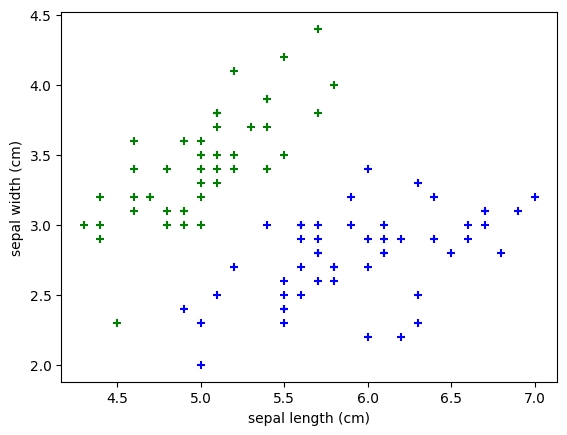

In [36]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color = "green",marker = "+")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = "blue",marker = "+")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'petal width (cm)')

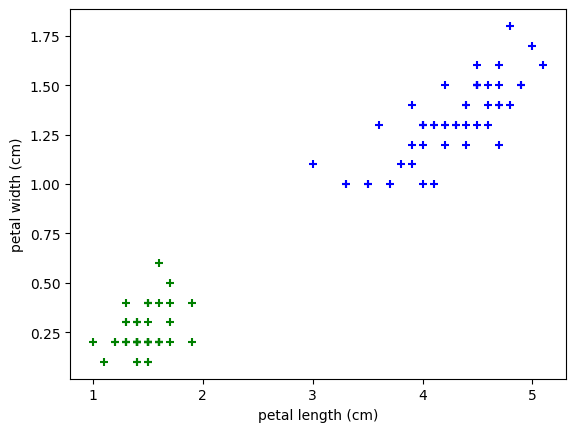

In [38]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = "green",marker = "+")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = "blue",marker = "+")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [43]:
X = df.drop(['target','flower_name'],axis = 'columns')
y = df.target

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [46]:
from sklearn.svm import SVC
model = SVC() 

In [47]:
model.fit(X_train,y_train)

SVC()

In [48]:
model.score(X_test,y_test)

0.9666666666666667

In [49]:
model.predict(X_test)

array([0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 0, 2, 2, 0, 1, 0, 0])

In [50]:
y_test

1      0
112    2
38     0
85     1
37     0
48     0
93     1
142    2
31     0
29     0
141    2
126    2
104    2
88     1
96     1
105    2
2      0
20     0
49     0
15     0
91     1
43     0
131    2
39     0
134    2
130    2
30     0
78     1
41     0
47     0
Name: target, dtype: int64

In [51]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[15,  0,  0],
       [ 0,  6,  0],
       [ 0,  1,  8]])

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

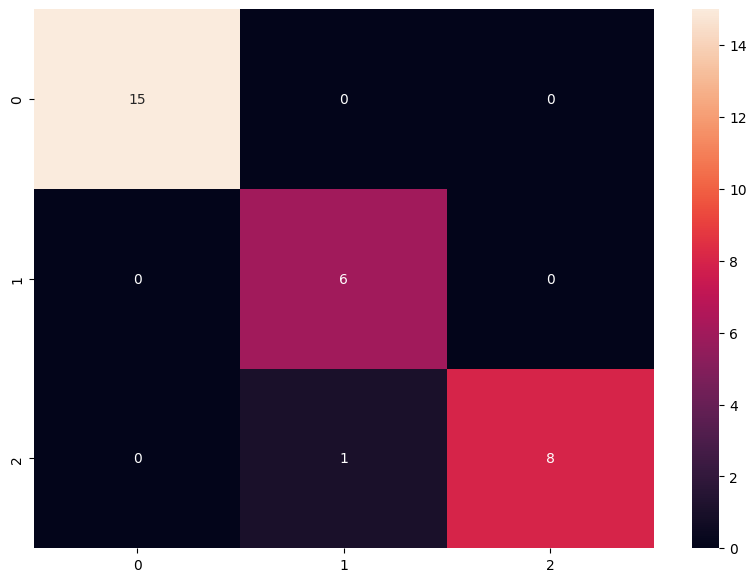

In [52]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlable("predicted")
plt.ylable("truth")